# Customer Forecasting with a Time Series Model - Training File

In this file the training codes will be explained in English. Tensorflow Keras LSTM layers used to write the model. Model aims to forecast customer number based on the hour and whether the day is a holiday or not.

It is the combined form of 3 data sets obtained after data mining. 
<br>
Data_Mining_Nov_06.ipynb
<br>
Data_Mining_Nov_11.ipynb
<br>
Data_Mining_Oct_30.ipynb

In [1]:
import pandas as pd
data = pd.read_csv('/content/all_data.csv') 

To use hours in the model, I have to use this formula:

$$
\text{hour\_sin} = \sin\left(2 \pi \cdot \frac{\text{hour}}{24}\right)
$$

$$
\text{hour\_cos} = \cos\left(2 \pi \cdot \frac{\text{hour}}{24}\right)
$$



In [2]:
import numpy as np
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

In [3]:
data.head()

,Unnamed: 0.1,date,pizza,burger,sushi,pasta,salad,steak,tacos,sandwich,...,salt,pepper,olive oil,vinegar,total,hour,is_holiday,Unnamed: 0,hour_sin,hour_cos
0,0,2024-10-30 15:00:00,35,11,10,14,31,28,18,27,...,48,61,19,31,1966,15,0,NaN,-0.707107,-7.071068e-01
1,1,2024-10-30 16:00:00,40,12,12,16,36,32,21,28,...,49,68,21,33,2149,16,0,NaN,-0.866025,-5.000000e-01
2,2,2024-10-30 17:00:00,45,13,13,17,35,35,24,28,...,50,72,20,35,2212,17,0,NaN,-0.965926,-2.588190e-01
3,3,2024-10-30 18:00:00,45,14,13,15,35,37,25,26,...,51,74,20,33,2233,18,0,NaN,-1.000000,-1.836970e-16
4,4,2024-10-30 19:00:00,43,13,12,15,36,77,24,29,...,54,72,23,33,2279,19,0,NaN,-0.965926,2.588190e-01


In [4]:
data=data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

By selecting the target columns in this way, we evaluate the model's hours and whether the day is a holiday or not.

In [5]:
x = data[['hour_sin', 'hour_cos', 'is_holiday']]
y = data['total']

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

This Sequential model is designed for time series prediction, utilizing three LSTM layers followed by two dense layers. The first LSTM layer has 128 units and takes input sequences of shape `(x.shape[1], 1)`, outputting a sequence to the next LSTM layer. The second LSTM layer has 64 units and also returns sequences, while the third LSTM layer has 32 units and outputs a single vector. Two dense layers follow: the first with 25 neurons for feature extraction and the second with 1 neuron for the final prediction. Compiled with the `mean_squared_error` loss and the `adam` optimizer, this architecture is optimized for regression tasks like forecasting temporal data.


In [7]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x.shape[1],1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 3, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │             825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,235 (504.82 KB)

 Trainable params: 129,235 (504.82 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.fit(x, y, batch_size=32, epochs=200)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 4267199.5000
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4185369.7500
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4089758.0000
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4259453.0000
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4178894.7500
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4128839.0000
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3934159.5000
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3966300.5000
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3980744.0000
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3782912.0000
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3950372.0000
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3819104.5000
Epoch 13/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3711444.0000
Epoch 14/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/ste

In [9]:
import matplotlib.pyplot as plt

This graphic shows average hourly sales patterns.

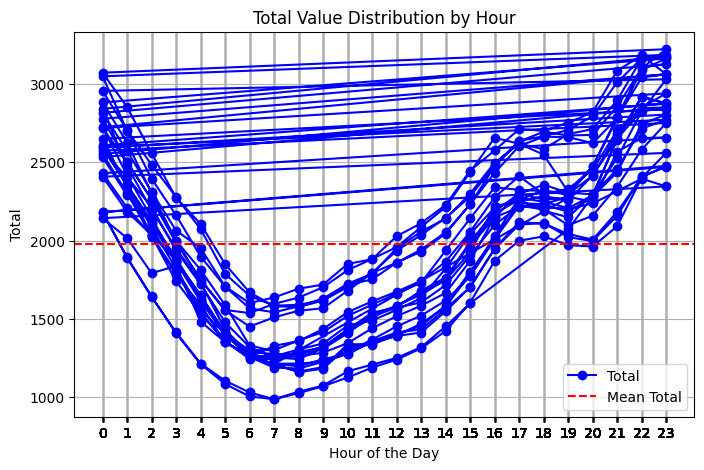

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(data['hour'], data['total'], marker='o', color='blue', label='Total')
plt.title('Total Value Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total')
plt.axhline(y=data['total'].mean(), color='red', linestyle='--', label='Mean Total')
plt.legend()
plt.grid()
plt.xticks(data['hour'])
plt.show()

In [11]:
predictions = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


The main reason we only look at the mean_squared_error metric is that what is important to us is how close the model can predict to the hourly average. For a model trained with less than 1000 rows of data, making predictions with errors that are not problematic is an indicator of how successful it is.

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data['total'], predictions)**.5
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 168.01828636864363


In [13]:
print(model.predict(np.array([[0, -0.707107, -7.071068e-01]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[1523.5632]]


In [14]:
predictions

array([[1880.7646],
       [2080.4612],
       [2183.1467],
       [2224.5   ],
       [2245.2048],
       [2276.0388],
       [2437.8518],
       [2660.688 ],
       [2681.9944],
       [2556.3335],
       [2273.3984],
       [2067.7495],
       [1851.7635],
       [1620.221 ],
       [1422.5277],
       [1305.7623],
       [1253.4711],
       [1251.5339],
       [1299.1274],
       [1368.0276],
       [1426.4822],
       [1506.2725],
       [1597.2047],
       [1696.3522],
       [1880.7646],
       [2080.4612],
       [2183.1467],
       [2224.5   ],
       [2245.2048],
       [2276.0388],
       [2437.8518],
       [2660.688 ],
       [2681.9944],
       [2556.3335],
       [2273.3984],
       [2067.7495],
       [1851.7635],
       [1620.221 ],
       [1422.5277],
       [1305.7623],
       [1253.4711],
       [1251.5339],
       [1299.1274],
       [1368.0276],
       [1426.4822],
       [1506.2725],
       [1597.2047],
       [1696.3522],
       [1880.7646],
       [2080.4612],


In [15]:
model.save("model.h5")

The model can forecast customer traffic succesfully. 